In [160]:
import sqlite3
import numpy as np
import mysql.connector
import pandas as pd
import getpass
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
plotly.tools.set_credentials_file(username='mainakchain', api_key='B9m4DVrYYmsoW3jDSiok')
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
import plotly.figure_factory as ff
from scipy import stats
# from sklearn.utils import shuffle
from sklearn.neural_network import MLPRegressor
# from sklearn.neural_network import MLPClassifier
# # from sklearn.ensemble import RandomForestRegressor
# from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from datetime import timedelta
from sklearn.ensemble import RandomForestRegressor
import datetime
import holidays
from sklearn.model_selection import cross_val_score
from sklearn.metrics import median_absolute_error
from sklearn.model_selection import GridSearchCV
# from sklearn.cross_validation import StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
# from sklearn.svm import LinearSVR
# from sklearn.svm import SVR
import pickle

%matplotlib inline

In [2]:
toll_time = pd.read_csv('new_toll_time_no_0.csv')

In [3]:
toll_time.shape

(3386, 11)

In [4]:
toll_time.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
new_toll_time = toll_time.copy()

In [6]:
today_date = datetime.datetime.now()
today_date.strftime("%Y-%m-%d %H:%M:%S")
today = today_date.strftime("%Y-%m-%d %H:%M:%S")
new_toll_time['today'] = datetime.datetime.strptime(today, '%Y-%m-%d %H:%M:%S')

In [11]:
new_toll_time['start_date'] = new_toll_time['start_date'].apply(lambda x:datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S') )
new_toll_time['days_from_now'] = new_toll_time['today'] - new_toll_time['start_date'] 
new_toll_time['days_from_now'] = new_toll_time['days_from_now'].apply(lambda x: x.days)

In [9]:
new_toll_time = toll_time.copy()

In [10]:
today_date = datetime.datetime.now()
today_date.strftime("%Y-%m-%d %H:%M:%S")
today = today_date.strftime("%Y-%m-%d %H:%M:%S")
new_toll_time['today'] = datetime.datetime.strptime(today, '%Y-%m-%d %H:%M:%S')

new_toll_time['start_date'] = new_toll_time['start_date'].apply(lambda x:datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S') )
new_toll_time['days_from_now'] = new_toll_time['today'] - new_toll_time['start_date'] 
new_toll_time['days_from_now'] = new_toll_time['days_from_now'].apply(lambda x: x.days)

new_toll_time['unloading_in_time'] = new_toll_time['unloading_in_time'].apply(lambda x:datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S') )
new_toll_time['avg_travel_time'] = new_toll_time['start_date'] + (new_toll_time['unloading_in_time'] - new_toll_time['start_date'])/2

new_toll_time['month_of_travel'] = new_toll_time['avg_travel_time'].apply(lambda x: x.month)

new_toll_time['ist_timestamp'] = new_toll_time['ist_timestamp'].apply(lambda x:datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
new_toll_time['time_of_travel'] = new_toll_time.ist_timestamp.apply(lambda x: x.hour)

new_toll_time['day_of_travel'] = new_toll_time['avg_travel_time'].apply(lambda x: x.weekday())

new_toll_time['loading_out_time'] = new_toll_time['loading_out_time'].apply(lambda x:datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S') )
new_toll_time['loading_out_time'] = new_toll_time['loading_out_time'].apply(lambda x: x.hour)

In [11]:
new_toll_time = new_toll_time[['toll_both','vehicle_no','loading_out_time','distance_travelled','time_of_travel','day_of_travel','month_of_travel','days_from_now','time_taken']]

In [12]:
df = pd.read_csv('SUPER_FINAL_DF.csv')

In [13]:
df

,toll_both,vehicle_no,loading_out_time,ist_timestamp,distance_travelled,time_of_travel,day_of_travel,month_of_travel,days_from_now,delivery,time_taken,delay,time_btn_tolls
0,Sergrarh,JH01AE6027,0,2017-11-09 13:57:40,0.00,13,2,11,42,1,85.678333,49.392083,85.678333
1,Manguli,JH01AE6027,0,2017-11-09 20:35:40,146.47,20,2,11,42,1,92.311667,49.692778,6.633333
2,Gudipada (Old Gangapada),JH01AE6027,0,2017-11-09 22:47:12,55.83,22,2,11,42,1,94.503889,50.178056,2.192222
3,Bellupada,JH01AE6027,0,2017-11-10 06:52:59,171.77,6,2,11,42,1,102.600278,47.963889,8.096389
4,Madapam,JH01AE6027,0,2017-11-10 13:30:33,114.17,13,2,11,42,1,109.226389,50.314722,6.626111
5,Chilakapalem,JH01AE6027,0,2017-11-10 14:09:56,27.46,14,2,11,42,1,109.882778,49.641944,0.656389
6,Nathavalasa/ Vizianagaram,JH01AE6027,0,2017-11-10 19:49:56,38.72,19,2,11,42,1,115.549444,53.543611,5.666667
7,Vempadu,JH01AE6027,0,2017-11-11 11:01:14,67.28,11,2,11,42,1,130.737778,61.925556,12.783056
8,Krishnavaram,JH01AE6027,0,2017-11-11 16:18:20,69.42,16,2,11,42,1,136.022778,63.340278,5.285000
9,Kaza,JH01AE6027,0,2017-11-11 23:39:01,209.57,23,2,11,42,1,143.367500,62.708889,7.344722


In [14]:
df['distance_travelled_cummulative'] = 0

for truck in df.vehicle_no.unique().tolist():
    for st_time in df[df.vehicle_no == truck].loading_out_time.unique().tolist():
        df.loc[(df['vehicle_no'] == truck) & (df['loading_out_time'] == st_time), 'distance_travelled_cummulative'] = df.loc[(df['vehicle_no'] == truck) & (df['loading_out_time'] == st_time)]['distance_travelled'].cumsum()



In [15]:
def find_toll_num(df):
    toll_dict_time = {}
    new_toll_dict_time = {}
    toll_dict_time_cum = {}
    new_toll_dict_time_cum = {}
    toll_dict_dist = {}
    new_toll_dict_dist = {}
    toll_dict_dist_cum = {}
    new_toll_dict_dist_cum = {}
    x_time = {}
    x_time_cum = {}
    x_dist = {}
    x_dist_cum = {}
    
    num = 1
    for toll in df.toll_both.unique().tolist():
        t = df['time_btn_tolls'][df.toll_both == toll].median()
        toll_dict_time[toll] = t
    
    for key, value in sorted(toll_dict_time.iteritems(), key=lambda (k,v): (v,k)):
        x_time[key] = value
        new_toll_dict_time[key] = num
        num+=1
        
    num = 1
    for toll in df.toll_both.unique().tolist():
        t = df['time_taken'][df.toll_both == toll].median()
        toll_dict_time_cum[toll] = t
    
    for key, value in sorted(toll_dict_time_cum.iteritems(), key=lambda (k,v): (v,k)):
        x_time_cum[key] = value
        new_toll_dict_time_cum[key] = num
        num+=1
        
    num = 1
    for toll in df.toll_both.unique().tolist():
        t = df['distance_travelled'][df.toll_both == toll].median()
        toll_dict_dist[toll] = t
    
    for key, value in sorted(toll_dict_dist.iteritems(), key=lambda (k,v): (v,k)):
        x_dist[key] = value
        new_toll_dict_dist[key] = num
        num+=1
        
    num = 1
    for toll in df.toll_both.unique().tolist():
        t = df['distance_travelled_cummulative'][df.toll_both == toll].median()
        toll_dict_dist_cum[toll] = t
    
    for key, value in sorted(toll_dict_dist_cum.iteritems(), key=lambda (k,v): (v,k)):
        x_dist_cum[key] = value
        new_toll_dict_dist_cum[key] = num
        num+=1
        
    return new_toll_dict_time, x_time, new_toll_dict_time_cum,x_time_cum,new_toll_dict_dist, x_dist, new_toll_dict_dist_cum, x_dist_cum

In [16]:
new_toll_dict_time,x_time, new_toll_dict_time_cum, x_time_cum, new_toll_dict_dist, x_dist, new_toll_dict_dist_cum, x_dist_cum= find_toll_num(df)

In [17]:
x_time

{'Bellupada': 3.71625,
 'Bolapalli': 2.738333333335,
 'Budanam': 3.361944444445,
 'Chilakapalem': 0.73,
 'Gaddurur': 9.877638888884999,
 'Gudipada (Old Gangapada)': 1.581944444445,
 'Gurapalli': 2.55333333333,
 'Kalaparru': 6.040277777775,
 'Kaza': 1.39027777778,
 'Krishnavaram': 2.54833333333,
 'Laxmipuram': 1.23055555556,
 'Madapam': 5.46555555556,
 'Manguli': 1.55277777778,
 'Mulbagal': 1.0299999999999998,
 'Nathavalasa/ Vizianagaram': 1.2236111111099999,
 'Panikholi': 2.78,
 'Pottipadu': 0.65,
 'Sergrarh': 36.28625,
 'Sunambatti (Musunur)': 1.846805555555,
 'Tangutur': 2.1072222222250003,
 'Vempadu': 6.11597222222}

In [18]:
import operator
toll_list = sorted(x_dist_cum.items(), key=operator.itemgetter(1))
test_toll_list = [i[0] for i in toll_list]

In [19]:
test_toll_list

['Sergrarh',
 'Panikholi',
 'Manguli',
 'Gudipada (Old Gangapada)',
 'Gurapalli',
 'Bellupada',
 'Madapam',
 'Chilakapalem',
 'Laxmipuram',
 'Nathavalasa/ Vizianagaram',
 'Vempadu',
 'Krishnavaram',
 'Kalaparru',
 'Pottipadu',
 'Kaza',
 'Bolapalli',
 'Tangutur',
 'Sunambatti (Musunur)',
 'Budanam',
 'Gaddurur',
 'Mulbagal']

In [20]:
train_df = new_toll_time.copy()



In [126]:
today_date = datetime.datetime.now()
vehicle = raw_input('Enter the vehicle no.: ')

loading_out = raw_input('Enter the loading out time in %Y-%m-%d %H:%M:%S format: ')
loading_out_delta = datetime.datetime.strptime(loading_out, '%Y-%m-%d %H:%M:%S')

toll = raw_input('Latest Toll both: ')
distance = input('Distance travelled from 1st toll in km: ')
ist = raw_input('IST Timestamp in %Y-%m-%d %H:%M:%S format: ')
ist_delta = datetime.datetime.strptime(ist, '%Y-%m-%d %H:%M:%S')      
ist_delta_given = ist_delta

Enter the vehicle no.: OM15452893
Enter the loading out time in %Y-%m-%d %H:%M:%S format: 2017-11-22 23:12:20
Latest Toll both: 
Distance travelled from 1st toll in km: 0
IST Timestamp in %Y-%m-%d %H:%M:%S format: 2017-11-22 23:12:20


In [127]:
test_df= pd.DataFrame(columns=['toll_both','vehicle_no','loading_out_time', 'distance_travelled', 'time_of_travel',
                                         'day_of_travel', 'month_of_travel', 'days_from_now'])
prev_time = ist_delta

if (toll == '') | (ist_delta == loading_out_delta):
    a = []
    for toll_ in test_toll_list :
        b = []
        distance = x_dist[toll_]
        ist_delta = prev_time + timedelta(hours=x_time[toll_])
        prev_time = ist_delta
        b.extend([toll_, vehicle, loading_out_delta.hour, distance, ist_delta.hour, ist_delta.weekday(), ist_delta.month,
                      (today_date - loading_out_delta).days])

        a.append(b)
        i = i + 1

    add_test_df = pd.DataFrame(a, columns= ['toll_both','vehicle_no','loading_out_time', 'distance_travelled', 'time_of_travel',
                                         'day_of_travel', 'month_of_travel', 'days_from_now'])

else:
    i = test_toll_list.index(toll)
    i = i+1
    
    a = []
    while i != len(test_toll_list):
        toll_ = test_toll_list[i]
        b = []
        distance = x_dist[toll_]
        ist_delta = prev_time + timedelta(hours=x_time[toll_])
        prev_time = ist_delta
        b.extend([toll_, vehicle, loading_out_delta.hour, distance, ist_delta.hour, ist_delta.weekday(), ist_delta.month,
                      (today_date - loading_out_delta).days])

        a.append(b)
        i = i + 1

    add_test_df = pd.DataFrame(a, columns= ['toll_both','vehicle_no','loading_out_time', 'distance_travelled', 'time_of_travel',
                                         'day_of_travel', 'month_of_travel', 'days_from_now'])

test_df = test_df.append(add_test_df)

In [128]:
train_df = new_toll_time[['toll_both','vehicle_no','loading_out_time','distance_travelled','time_of_travel','day_of_travel','month_of_travel','days_from_now','time_btn_tolls']]

In [129]:
test_df.head()

,toll_both,vehicle_no,loading_out_time,distance_travelled,time_of_travel,day_of_travel,month_of_travel,days_from_now
0,Sergrarh,OM15452893,23,0.000,11,4,11,34
1,Panikholi,OM15452893,23,93.440,14,4,11,34
2,Manguli,OM15452893,23,53.660,15,4,11,34
3,Gudipada (Old Gangapada),OM15452893,23,56.155,17,4,11,34
4,Gurapalli,OM15452893,23,88.000,19,4,11,34


In [130]:
train_df.head()

,toll_both,vehicle_no,loading_out_time,distance_travelled,time_of_travel,day_of_travel,month_of_travel,days_from_now,time_btn_tolls
0,Sergrarh,CG08L3445,10,0.00,1,4,12,9,0.000000
1,Panikholi,CG08L3445,10,93.73,4,4,12,9,2.653056
2,Manguli,CG08L3445,10,53.87,5,4,12,9,1.319722
3,Gudipada (Old Gangapada),CG08L3445,10,56.09,6,4,12,9,1.583889
4,Gurapalli,CG08L3445,10,87.68,10,4,12,9,3.122500


In [131]:
final_train_df = train_df.copy()
final_test_df = test_df.copy()


final_train_df.toll_both = final_train_df.toll_both.replace(new_toll_dict_time_cum)
final_test_df.toll_both = final_test_df.toll_both.replace(new_toll_dict_time_cum)

In [132]:
final_train_df = final_train_df.reset_index(drop=True)
final_test_df = final_test_df.reset_index(drop=True)

In [133]:
def change_vehicle_no_to_dummy(df):
    num = 1
    dict_vehicle_no = {}
    for truck in df['vehicle_no'].unique().tolist():
        df['vehicle_no'] = df['vehicle_no'].replace({truck: num})
        dict_vehicle_no[num] = truck
        num += 1
    return dict_vehicle_no

In [134]:
train_test_df = (final_train_df.drop(['time_btn_tolls'], axis=1)).append(final_test_df, ignore_index=True)

In [135]:
dict_vehicle_no = change_vehicle_no_to_dummy(train_test_df)
rev_dict_vehicle_no = dict((v,k) for k,v in dict_vehicle_no.iteritems())

In [136]:
final_train_df['vehicle_no'] = final_train_df['vehicle_no'].replace(rev_dict_vehicle_no)
final_test_df['vehicle_no'] = final_test_df['vehicle_no'].replace(rev_dict_vehicle_no)

In [137]:
final_train_df.head()

,toll_both,vehicle_no,loading_out_time,distance_travelled,time_of_travel,day_of_travel,month_of_travel,days_from_now,time_btn_tolls
0,1,1,10,0.00,1,4,12,9,0.000000
1,2,1,10,93.73,4,4,12,9,2.653056
2,3,1,10,53.87,5,4,12,9,1.319722
3,4,1,10,56.09,6,4,12,9,1.583889
4,5,1,10,87.68,10,4,12,9,3.122500


In [138]:
final_test_df.head()

,toll_both,vehicle_no,loading_out_time,distance_travelled,time_of_travel,day_of_travel,month_of_travel,days_from_now
0,1,131,23,0.000,11,4,11,34
1,2,131,23,93.440,14,4,11,34
2,3,131,23,53.660,15,4,11,34
3,4,131,23,56.155,17,4,11,34
4,5,131,23,88.000,19,4,11,34


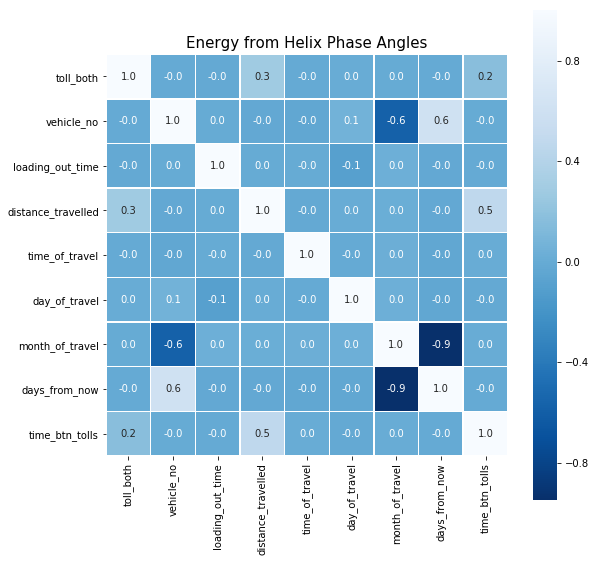

In [159]:
# seaborn heatmap documentation
# https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.heatmap.html

# cmap choices: http://matplotlib.org/users/colormaps.html
plt.figure(figsize=(9,9))
# pivot_table = phase_1_2.pivot('helix1 phase', 'helix 2 phase','Energy')
plt.xlabel('helix 2 phase', size = 15)
plt.ylabel('helix1 phase', size = 15)
plt.title('Energy from Helix Phase Angles', size = 15)
sns.heatmap(final_train_df.corr(), annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r')

In [139]:
# ALGO APPLICATION

In [140]:
train_X = final_train_df.drop(['time_btn_tolls'], axis=1)
train_y = final_train_df.time_btn_tolls

In [141]:
X_train, X_test, y_train, y_test = train_test_split(train_X,train_y, test_size=0.3, random_state=42)

In [142]:
reg_mlp = MLPRegressor(hidden_layer_sizes=(1000,), activation='logistic', alpha=7, solver='lbfgs', random_state=42)

In [143]:
scale= MinMaxScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.fit_transform(X_test)

In [144]:
reg_mlp.fit(X_train_scaled, y_train)
# reg_mlp.score(X_test_scaled, y_test) * 100

MLPRegressor(activation='logistic', alpha=7, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(1000,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [161]:
scores = cross_val_score(reg_mlp, X_train_scaled, y_train, scoring='neg_mean_squared_error', n_jobs=-1)
print("Accuracy: %0.2f (+/- %0.2f)" % (np.abs(scores).mean(), scores.std() * 2))

Accuracy: 0.70 (+/- 0.13)


In [146]:
scale = MinMaxScaler()
X_predict_scaled = scale.fit_transform(final_test_df)

In [147]:
predictions = reg_mlp.predict(X_predict_scaled)

In [148]:
show_df = test_df.copy()
show_df['predicted'] = predictions

In [149]:
show_df

,toll_both,vehicle_no,loading_out_time,distance_travelled,time_of_travel,day_of_travel,month_of_travel,days_from_now,predicted
0,Sergrarh,OM15452893,23,0.000,11,4,11,34,0.215531
1,Panikholi,OM15452893,23,93.440,14,4,11,34,11.644318
2,Manguli,OM15452893,23,53.660,15,4,11,34,6.877769
3,Gudipada (Old Gangapada),OM15452893,23,56.155,17,4,11,34,7.240483
4,Gurapalli,OM15452893,23,88.000,19,4,11,34,11.157018
5,Bellupada,OM15452893,23,83.835,23,4,11,34,10.727640
6,Madapam,OM15452893,23,115.690,5,5,11,34,14.149853
7,Chilakapalem,OM15452893,23,27.020,5,5,11,34,3.457089
8,Laxmipuram,OM15452893,23,39.260,7,5,11,34,5.008926
9,Nathavalasa/ Vizianagaram,OM15452893,23,39.335,8,5,11,34,5.070169


In [203]:
show_df['avg_pred_med'] = (show_df['predicted'] + show_df['med_time']) / 2

In [224]:
x = train_df
x['avg_speed'] = x.distance_travelled/ x.time_taken
x = x[x.vehicle_no == 25].sort_values('distance_travelled')
x['avg_speed'] = x.distance_travelled/(x.time_taken - 40.88)
x

,toll_both,vehicle_no,loading_out_time,distance_travelled,time_of_travel,day_of_travel,month_of_travel,days_from_now,time_taken,avg_speed
793,27,25,23,0.00,16,3,11,24,40.885833,0.000000
704,25,25,23,90.70,21,3,11,24,45.974444,17.803708
576,20,25,23,147.17,5,3,11,24,53.906389,11.297836
235,9,25,23,204.06,6,3,11,24,55.247222,14.203163
280,10,25,23,292.31,9,3,11,24,58.063611,17.010976
27,3,25,23,377.35,13,3,11,24,61.943889,17.914546
528,18,25,23,493.02,17,3,11,24,66.076667,19.566874
154,6,25,23,520.71,18,3,11,24,66.876667,20.029876
657,22,25,23,560.93,19,3,11,24,67.979444,20.698948
484,17,25,23,560.93,19,3,11,24,67.979444,20.698948


In [ ]:
train_df[train_df['vehicle_no'] == 45]

In [215]:
show_df['avg_speed_pred'] = show_df['distance_travelled']/show_df['predicted']
show_df['avg_speed_med'] = show_df['distance_travelled']/show_df['med_time']

In [217]:
show_df['test_pred'] = show_df['predicted'] + show_df.avg_speed_pred

In [218]:
show_df

,toll_both,vehicle_no,loading_out_time,distance_travelled,time_of_travel,day_of_travel,month_of_travel,days_from_now,predicted,predict_diff,med_time,mean_time,avg_pred_med,avg_speed_pred,avg_speed_med,avg_speed_mean,test_pred
0,1,1,12,203.320,10,6,11,40,60.305124,NaN,84.090278,84.090278,72.197701,3.371521,2.417878,2.417878,63.676645
1,2,1,12,291.250,13,6,11,40,62.938448,2.633323,93.539722,112.452738,78.239085,4.627537,3.113650,2.589977,67.565985
2,3,1,12,375.245,20,6,11,40,64.313343,1.374895,56.755556,61.037500,60.534449,5.834637,6.611599,6.147778,70.147980
3,4,1,12,490.530,0,0,11,40,58.601461,-5.711881,92.291944,99.164912,75.446703,8.370610,5.314982,4.946609,66.972072
4,5,1,12,517.415,3,0,11,40,59.647295,1.045834,106.137500,113.508902,82.892398,8.674576,4.874950,4.558365,68.321871
5,6,1,12,556.620,5,0,11,40,61.671978,2.024683,63.638889,66.576692,62.655434,9.025493,8.746539,8.360584,70.697471
6,7,1,12,556.620,5,0,11,40,61.477310,-0.194668,48.963056,48.963056,55.220183,9.054072,11.368163,11.368163,70.531382
7,8,1,12,684.270,11,0,11,40,68.672551,7.195241,122.277500,130.865833,95.475025,9.964243,5.596042,5.228790,78.636794
8,9,1,12,753.930,16,0,11,40,72.610093,3.937542,45.996250,50.308219,59.303171,10.383267,16.391119,14.986219,82.993360
9,10,1,12,897.510,2,1,11,40,65.359971,-7.250122,49.686667,52.731903,57.523319,13.731799,18.063397,17.020247,79.091770


In [154]:
show_df['eta'] = show_df['predicted'].cumsum()
show_df['eta'] = show_df['eta'].apply(lambda x: ist_delta_given + timedelta(hours=x) )

In [162]:
#save the model using pickle model
filename = 'finalized_model.sav'
pickle.dump(reg_mlp, open(filename, 'wb'))


In [163]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

scale = MinMaxScaler()
X_predict_scaled = scale.fit_transform(final_test_df)

predictions = loaded_model.predict(X_predict_scaled)


In [179]:
show_df = test_df.copy()
show_df['predicted'] = predictions

In [180]:
show_df['eta'] = show_df['predicted'].cumsum()
show_df['eta'] = show_df['eta'].apply(lambda x: ist_delta_given + timedelta(hours=x) )

In [189]:
show_df

,toll_both,vehicle_no,loading_out_time,distance_travelled,time_of_travel,day_of_travel,month_of_travel,days_from_now,predicted,eta
0,Sergrarh,OM15452893,23,0.000,11,4,11,34,38.086250,2017-11-24 13:29:30.500
1,Panikholi,OM15452893,23,93.440,14,4,11,34,4.580000,2017-11-24 18:14:59.000
2,Manguli,OM15452893,23,53.660,15,4,11,34,3.352778,2017-11-24 19:49:28.000
3,Gudipada (Old Gangapada),OM15452893,23,56.155,17,4,11,34,3.381944,2017-11-24 21:31:53.000
4,Gurapalli,OM15452893,23,88.000,19,4,11,34,4.353333,2017-11-25 00:57:28.000
5,Bellupada,OM15452893,23,83.835,23,4,11,34,5.516250,2017-11-25 07:50:31.000
6,Madapam,OM15452893,23,115.690,5,5,11,34,7.265556,2017-11-25 12:07:02.000
7,Chilakapalem,OM15452893,23,27.020,5,5,11,34,2.530000,2017-11-25 13:26:47.000
8,Laxmipuram,OM15452893,23,39.260,7,5,11,34,3.030556,2017-11-25 14:49:03.000
9,Nathavalasa/ Vizianagaram,OM15452893,23,39.335,8,5,11,34,3.023611,2017-11-25 15:12:41.000
